# Credit Score Prediction using Feedforward Neural Network

**Goal:** Predict customer credit score category (Poor, Standard, Good) using financial and personal data.

**Approach:** Feedforward Neural Network (FNN) with multi-class classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## 2. Load and Explore Data

In [3]:
# Load the dataset
# Upload your CSV file to Colab or specify the path
df = pd.read_csv('/content/drive/MyDrive/synthetic_e2dabba50a1a4fbcabd601f7883eef1e.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (4995, 87)

First few rows:


,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,sdv-id-AWJoYv,191494,180225,1139049,1.0078,5.6095,5.0460,10767,820,0.2560,...,0.7498,0.1892,High,1,0,0,1,0,549,0
1,sdv-id-MqZrHS,254424,417046,2352895,0.8015,9.1589,5.5971,8334,5446,0.7503,...,0.8193,0.1196,No,1,1,0,1,1,585,0
2,sdv-id-Evqdpj,289663,1164809,391824,4.2743,1.1205,0.4475,28508,11466,0.5036,...,0.1899,0.6184,High,1,0,1,1,1,606,0
3,sdv-id-CHnYOs,135976,262012,587142,1.5431,5.0954,2.8511,12821,2232,0.1118,...,0.3968,0.2254,No,1,0,0,1,0,662,0
4,sdv-id-ByqsvL,205132,646284,1888055,3.9963,8.3456,2.3779,9073,1526,0.1994,...,0.2813,0.1406,No,1,0,0,1,0,598,0


In [4]:
# Dataset info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  4995 non-null   object 
 1   INCOME                   4995 non-null   int64  
 2   SAVINGS                  4995 non-null   int64  
 3   DEBT                     4995 non-null   int64  
 4   R_SAVINGS_INCOME         4995 non-null   float64
 5   R_DEBT_INCOME            4995 non-null   float64
 6   R_DEBT_SAVINGS           4995 non-null   float64
 7   T_CLOTHING_12            4995 non-null   int64  
 8   T_CLOTHING_6             4995 non-null   int64  
 9   R_CLOTHING               4995 non-null   float64
 10  R_CLOTHING_INCOME        4995 non-null   float64
 11  R_CLOTHING_SAVINGS       4995 non-null   float64
 12  R_CLOTHING_DEBT          4995 non-null   float64
 13  T_EDUCATION_12           4995 non-null   int64  
 14  T_E

In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Statistical summary
print("\nStatistical Summary:")
df.describe()

Missing values:
0

Statistical Summary:


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,4995.000000,4.995000e+03,4.995000e+03,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,...,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,112030.816016,4.184128e+05,7.200020e+05,4.489922,6.176271,6.731365,7336.379580,3252.797998,0.453754,0.056720,...,0.933820,0.716500,0.651286,0.945345,0.220220,0.180981,0.994194,0.174575,587.779980,0.290891
std,121991.815056,4.384830e+05,9.975662e+05,4.382761,4.924046,14.994629,7483.619666,5182.946091,0.242308,0.038266,...,0.169589,1.220073,1.385736,0.227328,0.414437,0.385041,0.075982,0.379641,62.274917,0.454219
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.083300,0.006800,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.067600,0.033800,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000
25%,8950.500000,7.575250e+04,1.998050e+04,0.980800,2.246250,0.684450,1314.000000,61.000000,0.257050,0.028550,...,0.807250,0.161150,0.101200,1.000000,0.000000,0.000000,1.000000,0.000000,551.000000,0.000000
50%,61229.000000,2.891120e+05,2.271580e+05,2.977400,5.125400,2.368600,5185.000000,1008.000000,0.438900,0.047500,...,0.922100,0.333400,0.238000,1.000000,0.000000,0.000000,1.000000,0.000000,595.000000,0.000000
75%,191468.000000,6.234835e+05,1.095794e+06,6.799900,8.986100,6.259600,11095.000000,4196.000000,0.639750,0.075000,...,1.028200,0.719300,0.658050,1.000000,0.000000,0.000000,1.000000,0.000000,634.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,33.235100,251.571000,43255.000000,39918.000000,1.058300,0.251700,...,1.662800,10.001900,10.005300,1.000000,1.000000,1.000000,1.000000,1.000000,773.000000,1.000000


Credit Score Distribution:
CREDIT_SCORE
627    42
590    41
647    41
621    41
577    41
       ..
365     1
427     1
361     1
388     1
435     1
Name: count, Length: 351, dtype: int64


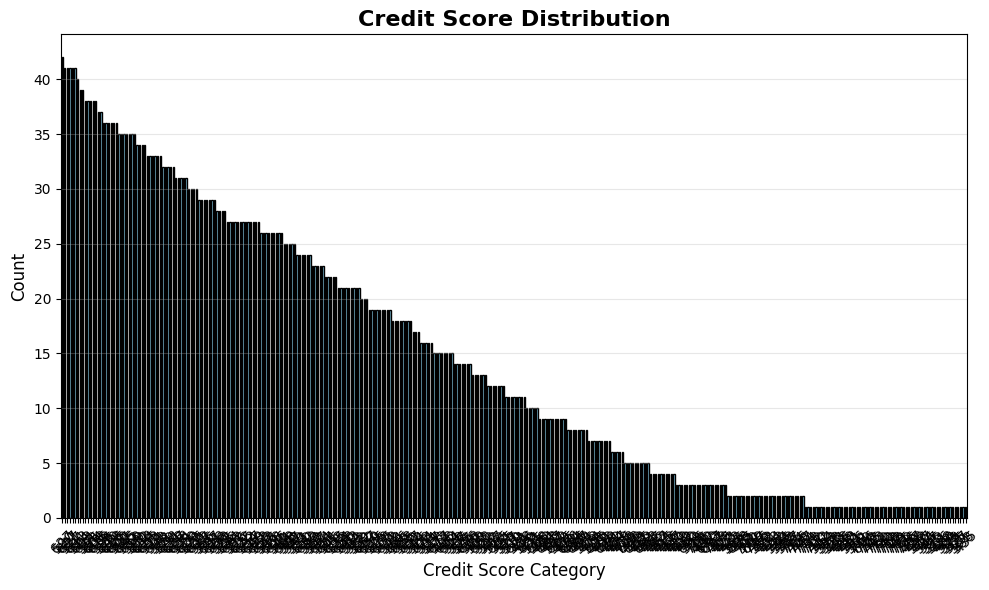

In [6]:
# Check target variable distribution
print("Credit Score Distribution:")
print(df['CREDIT_SCORE'].value_counts())

# Visualize credit score distribution
plt.figure(figsize=(10, 6))
df['CREDIT_SCORE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Credit Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Default Distribution:
DEFAULT
0    3542
1    1453
Name: count, dtype: int64


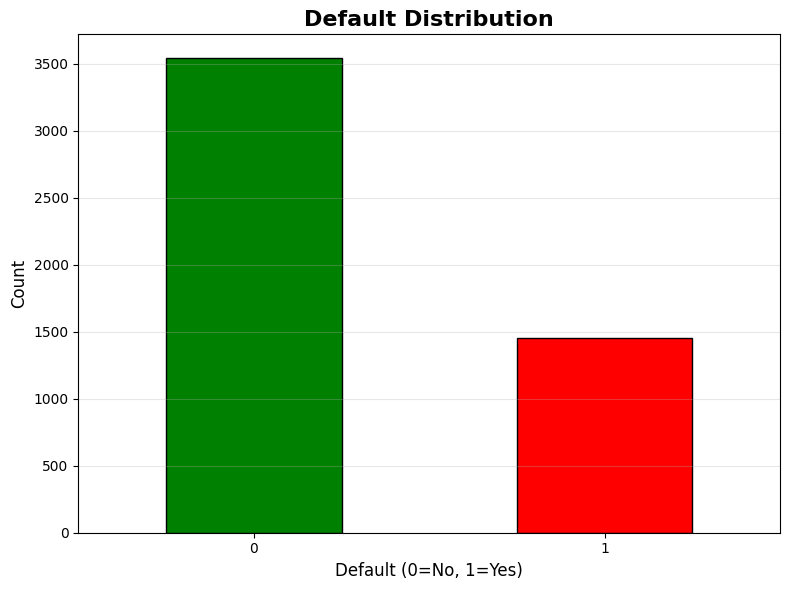

In [7]:
# Check DEFAULT distribution
print("\nDefault Distribution:")
print(df['DEFAULT'].value_counts())

plt.figure(figsize=(8, 6))
df['DEFAULT'].value_counts().plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Default Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Default (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [8]:
# Separate features and targets
# Drop CUST_ID as it's just an identifier
X = df.drop(['CUST_ID', 'CREDIT_SCORE', 'DEFAULT'], axis=1)
y_credit_score = df['CREDIT_SCORE']
y_default = df['DEFAULT']

print("Features shape:", X.shape)
print("Target (Credit Score) shape:", y_credit_score.shape)
print("Target (Default) shape:", y_default.shape)

Features shape: (4995, 84)
Target (Credit Score) shape: (4995,)
Target (Default) shape: (4995,)


In [9]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {len(numerical_cols)} columns")

Categorical columns (1): ['CAT_GAMBLING']

Numerical columns (83): 83 columns


In [10]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {X[col].unique()} -> {X_encoded[col].unique()}")

print("\nEncoding complete!")

Encoded CAT_GAMBLING: ['High' 'No' 'Low'] -> [0 2 1]

Encoding complete!


In [11]:
# Encode target variable (Credit Score)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y_credit_score)

print("Credit Score Mapping:")
for i, label in enumerate(le_target.classes_):
    print(f"{label} -> {i}")

# Get number of classes
num_classes = len(le_target.classes_)
print(f"\nNumber of classes: {num_classes}")

Credit Score Mapping:
300 -> 0
313 -> 1
330 -> 2
351 -> 3
352 -> 4
358 -> 5
361 -> 6
363 -> 7
365 -> 8
368 -> 9
369 -> 10
373 -> 11
374 -> 12
375 -> 13
376 -> 14
379 -> 15
381 -> 16
383 -> 17
385 -> 18
386 -> 19
388 -> 20
390 -> 21
392 -> 22
395 -> 23
396 -> 24
397 -> 25
398 -> 26
399 -> 27
400 -> 28
405 -> 29
407 -> 30
411 -> 31
412 -> 32
413 -> 33
414 -> 34
415 -> 35
416 -> 36
417 -> 37
418 -> 38
419 -> 39
421 -> 40
422 -> 41
423 -> 42
425 -> 43
426 -> 44
427 -> 45
428 -> 46
429 -> 47
430 -> 48
431 -> 49
432 -> 50
433 -> 51
434 -> 52
435 -> 53
436 -> 54
437 -> 55
438 -> 56
439 -> 57
440 -> 58
441 -> 59
442 -> 60
443 -> 61
444 -> 62
445 -> 63
446 -> 64
447 -> 65
448 -> 66
449 -> 67
450 -> 68
451 -> 69
452 -> 70
453 -> 71
454 -> 72
455 -> 73
456 -> 74
457 -> 75
458 -> 76
459 -> 77
460 -> 78
461 -> 79
462 -> 80
463 -> 81
464 -> 82
465 -> 83
466 -> 84
467 -> 85
468 -> 86
469 -> 87
470 -> 88
471 -> 89
472 -> 90
473 -> 91
474 -> 92
475 -> 93
476 -> 94
477 -> 95
478 -> 96
479 -> 97
480 -> 9

In [15]:
# Identify classes with only one member
class_counts = pd.Series(y_encoded).value_counts()
single_member_classes = class_counts[class_counts == 1].index.tolist()

# Create a boolean mask to keep only samples from classes with more than one member
# We convert to Series to use .isin() for cleaner filtering based on y_encoded values
mask = ~pd.Series(y_encoded).isin(single_member_classes)

# Filter X_encoded and y_encoded
X_filtered = X_encoded[mask]
y_filtered = y_encoded[mask]

# Split data into train and test sets using the filtered data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3945, 84)
Test set size: (987, 84)


In [17]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete!")
print("Training data shape after scaling:", X_train_scaled.shape)
print("Test data shape after scaling:", X_test_scaled.shape)

Feature scaling complete!
Training data shape after scaling: (3945, 84)
Test data shape after scaling: (987, 84)


In [18]:
# Convert labels to categorical (one-hot encoding for multi-class)
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

print("One-hot encoded labels shape:")
print("Train:", y_train_categorical.shape)
print("Test:", y_test_categorical.shape)
print("\nExample of one-hot encoding:")
print(f"Original label: {y_train[0]} -> One-hot: {y_train_categorical[0]}")

One-hot encoded labels shape:
Train: (3945, 351)
Test: (987, 351)

Example of one-hot encoding:
Original label: 217 -> One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## 4. Build Feedforward Neural Network Model

In [19]:
# Define model architecture
def create_fnn_model(input_dim, num_classes, hidden_layers=[128, 64, 32]):
    """
    Create a Feedforward Neural Network for multi-class classification

    Args:
        input_dim: Number of input features
        num_classes: Number of output classes
        hidden_layers: List of hidden layer sizes

    Returns:
        Compiled Keras model
    """
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(input_dim,)))

    # Hidden layers with ReLU activation and Dropout for regularization
    for i, units in enumerate(hidden_layers):
        model.add(layers.Dense(units, activation='relu', name=f'hidden_{i+1}'))
        model.add(layers.Dropout(0.3, name=f'dropout_{i+1}'))
        model.add(layers.BatchNormalization(name=f'batch_norm_{i+1}'))

    # Output layer with Softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax', name='output'))

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [20]:
# Create the model
input_dim = X_train_scaled.shape[1]
model = create_fnn_model(input_dim, num_classes, hidden_layers=[128, 64, 32])

# Display model architecture
print("Model Architecture:")
model.summary()

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 351)            │        11,583 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,695 (131.62 KB)

 Trainable params: 33,247 (129.87 KB)

 Non-trainable params: 448 (1.75 KB)

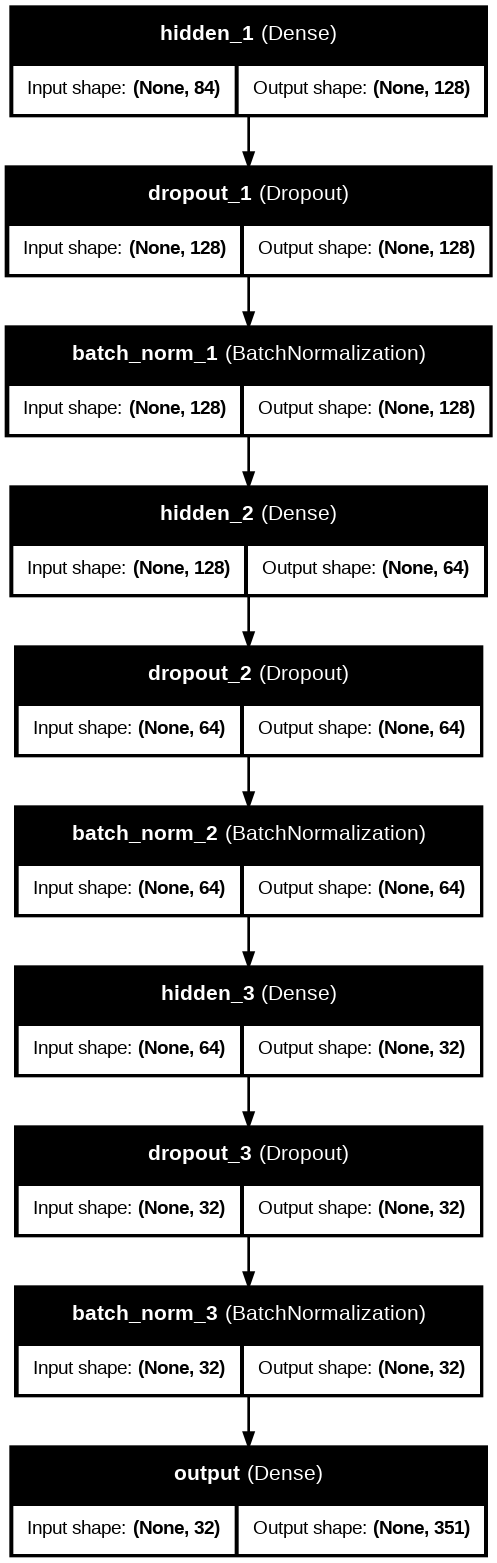

In [21]:
# Visualize model architecture
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    dpi=96
)

from IPython.display import Image
Image('model_architecture.png')

## 5. Train the Model

In [22]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("Starting model training...\n")
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nTraining complete!")

Starting model training...

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.0030 - loss: 5.9155 - val_accuracy: 0.0076 - val_loss: 5.8293 - learning_rate: 0.0010
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0090 - loss: 5.8169 - val_accuracy: 0.0076 - val_loss: 5.7709 - learning_rate: 0.0010
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0080 - loss: 5.7380 - val_accuracy: 0.0051 - val_loss: 5.6797 - learning_rate: 0.0010
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0177 - loss: 5.6126 - val_accuracy: 0.0063 - val_loss: 5.5826 - learning_rate: 0.0010
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0123 - loss: 5.4920 - val_accuracy: 0.0063 - val_loss: 5.5106 - learning_rate: 0.0010
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0166 - loss: 5.3979 - val_accuracy: 0.0038 - val_loss: 5.4576 - learning_rate: 0.0010
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0

## 6. Visualize Training History

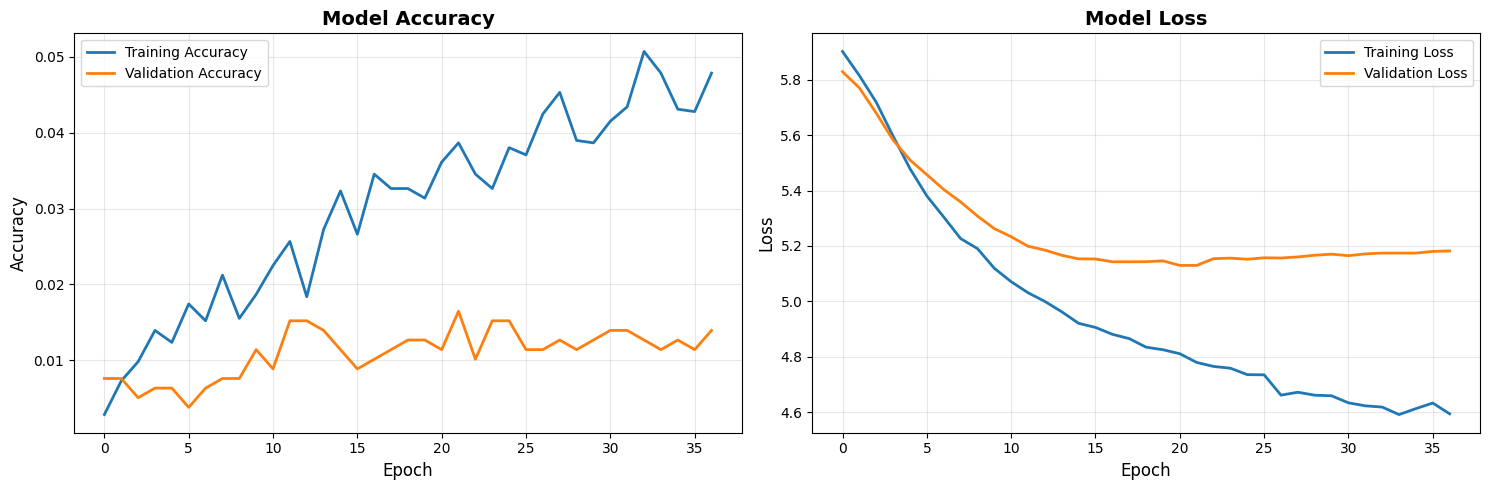

In [23]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Model Evaluation

In [24]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)

print("="*50)
print("TEST SET PERFORMANCE")
print("="*50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print("="*50)

TEST SET PERFORMANCE
Test Loss: 5.0335
Test Accuracy: 1.93%


In [25]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

print("Prediction probabilities shape:", y_pred_proba.shape)
print("Predictions shape:", y_pred.shape)
print("\nExample predictions (first 5):")
for i in range(5):
    print(f"True: {le_target.classes_[y_test[i]]}, Predicted: {le_target.classes_[y_pred[i]]}, Probabilities: {y_pred_proba[i]}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Prediction probabilities shape: (987, 351)
Predictions shape: (987,)

Example predictions (first 5):
True: 655, Predicted: 636, Probabilities: [1.78933551e-05 9.14462453e-06 3.77866381e-05 9.93406138e-06
 8.41543715e-06 3.14952485e-05 8.37370408e-06 4.84736374e-05
 8.45288650e-06 2.78693878e-05 9.00746090e-06 7.42832526e-06
 1.04773007e-05 8.13715997e-06 7.78040885e-06 7.88489615e-06
 9.74051727e-06 7.50482968e-06 9.11376083e-06 3.12330012e-05
 7.97867688e-06 1.97495065e-05 7.09262076e-06 8.49734170e-06
 2.43220729e-05 8.20690366e-06 7.61580486e-06 3.26529807e-05
 7.12780002e-06 4.03621561e-05 2.98879149e-05 1.01933820e-05
 9.93113463e-06 6.36424229e-05 9.26956091e-06 6.84836414e-05
 9.75462808e-06 7.95033702e-06 2.16872595e-05 4.54791079e-05
 8.80714833e-06 4.64451477e-05 4.71158310e-05 2.92330351e-05
 2.73015467e-05 8.67988911e-06 7.65452023e-06 2.73243786e-05
 8.05483978e-06 3.70353773e-05 7.33595289e-06 5.61932502e-05
 7.52907363e-06 7.480099

In [28]:
# Classification metrics
print("\nCLASSIFICATION REPORT")
print("="*70)

# Get the unique labels present in y_test
unique_labels_in_test = np.unique(y_test)

# Map these unique labels to their corresponding string names
# le_target.classes_ maps encoded index to original value.
# We need to ensure we only get the names for the labels actually present in y_test.
target_names_for_report = le_target.classes_[unique_labels_in_test].astype(str)

print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels_in_test, # Explicitly pass the labels present in y_test
    target_names=target_names_for_report, # Use the filtered target names
    digits=4
))
print("="*70)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

         300     0.0909    1.0000    0.1667         1
         399     0.0000    0.0000    0.0000         1
         413     0.0000    0.0000    0.0000         1
         415     0.0000    0.0000    0.0000         1
         418     0.0000    0.0000    0.0000         1
         419     0.0000    0.0000    0.0000         1
         422     0.0000    0.0000    0.0000         1
         423     0.0000    0.0000    0.0000         1
         425     0.0000    0.0000    0.0000         1
         426     0.0000    0.0000    0.0000         1
         432     0.0000    0.0000    0.0000         1
         439     0.0000    0.0000    0.0000         1
         440     0.0000    0.0000    0.0000         1
         450     0.0000    0.0000    0.0000         1
         451     0.0000    0.0000    0.0000         1
         452     0.0000    0.0000    0.0000         1
         455     0.0000    0.0000    0.0000         1
    

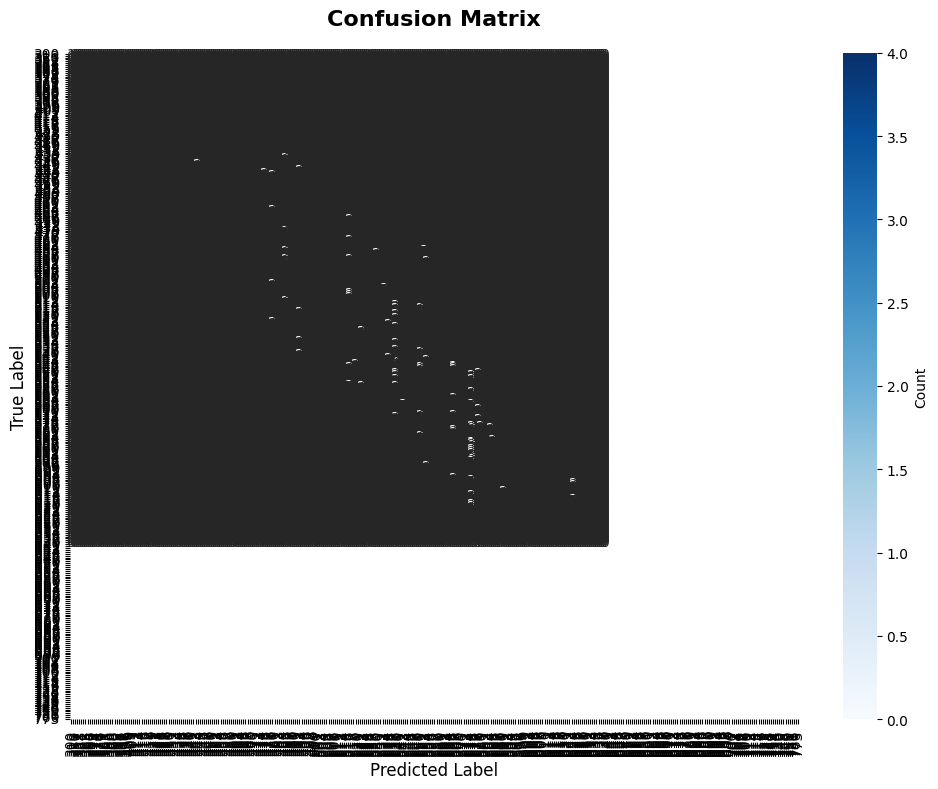

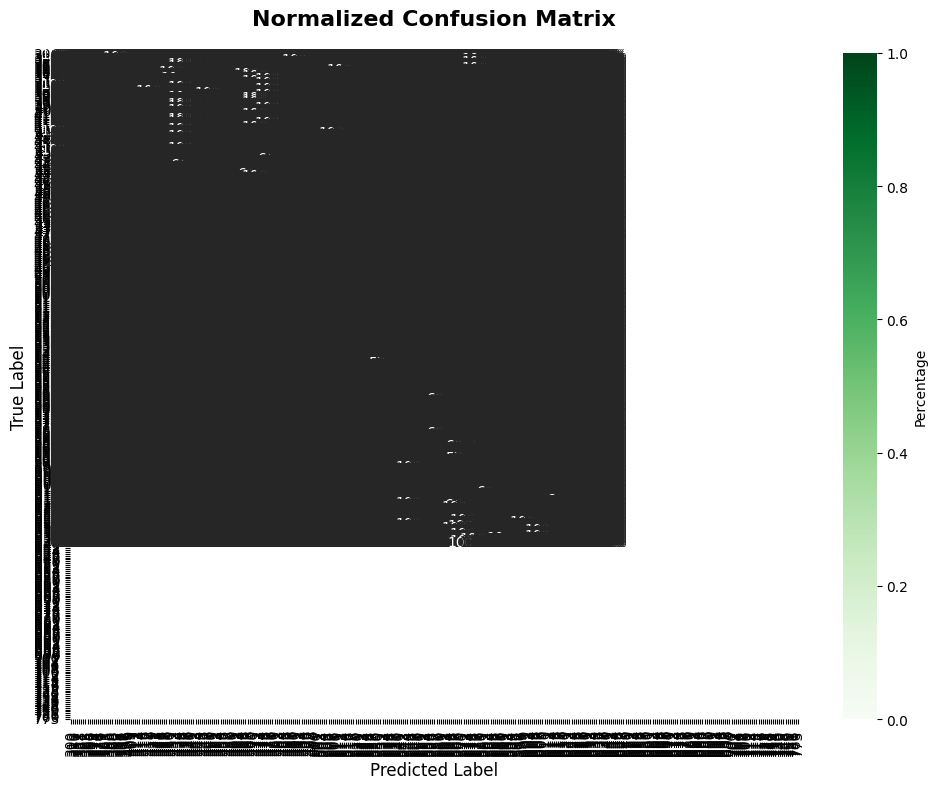

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_,
    cbar_kws={'label': 'Count'}
)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2%',
    cmap='Greens',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Normalized Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# Per-class metrics

# Get the unique labels present in y_test (these are the *encoded* labels)
unique_labels_in_test = np.unique(y_test)

# Calculate precision, recall, and f1-score only for the unique labels present in y_test
precision = precision_score(y_test, y_pred, average=None, labels=unique_labels_in_test)
recall = recall_score(y_test, y_pred, average=None, labels=unique_labels_in_test)
f1 = f1_score(y_test, y_pred, average=None, labels=unique_labels_in_test)

# Get the original class names corresponding to these unique encoded labels
class_names_for_metrics = le_target.classes_[unique_labels_in_test]

# Calculate support for each of these unique labels
# Use value_counts and reindex to ensure correct order and handle potentially missing predictions
support = pd.Series(y_test).value_counts().reindex(unique_labels_in_test, fill_value=0).values

metrics_df = pd.DataFrame({
    'Class': class_names_for_metrics,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nPER-CLASS METRICS")
print("="*70)
print(metrics_df.to_string(index=False))
print("="*70)


PER-CLASS METRICS
 Class  Precision   Recall  F1-Score  Support
   300   0.090909 1.000000  0.166667        1
   399   0.000000 0.000000  0.000000        1
   413   0.000000 0.000000  0.000000        1
   415   0.000000 0.000000  0.000000        1
   418   0.000000 0.000000  0.000000        1
   419   0.000000 0.000000  0.000000        1
   422   0.000000 0.000000  0.000000        1
   423   0.000000 0.000000  0.000000        1
   425   0.000000 0.000000  0.000000        1
   426   0.000000 0.000000  0.000000        1
   432   0.000000 0.000000  0.000000        1
   439   0.000000 0.000000  0.000000        1
   440   0.000000 0.000000  0.000000        1
   450   0.000000 0.000000  0.000000        1
   451   0.000000 0.000000  0.000000        1
   452   0.000000 0.000000  0.000000        1
   455   0.000000 0.000000  0.000000        1
   457   0.000000 0.000000  0.000000        1
   459   0.000000 0.000000  0.000000        1
   460   0.000000 0.000000  0.000000        1
   461   0.0000

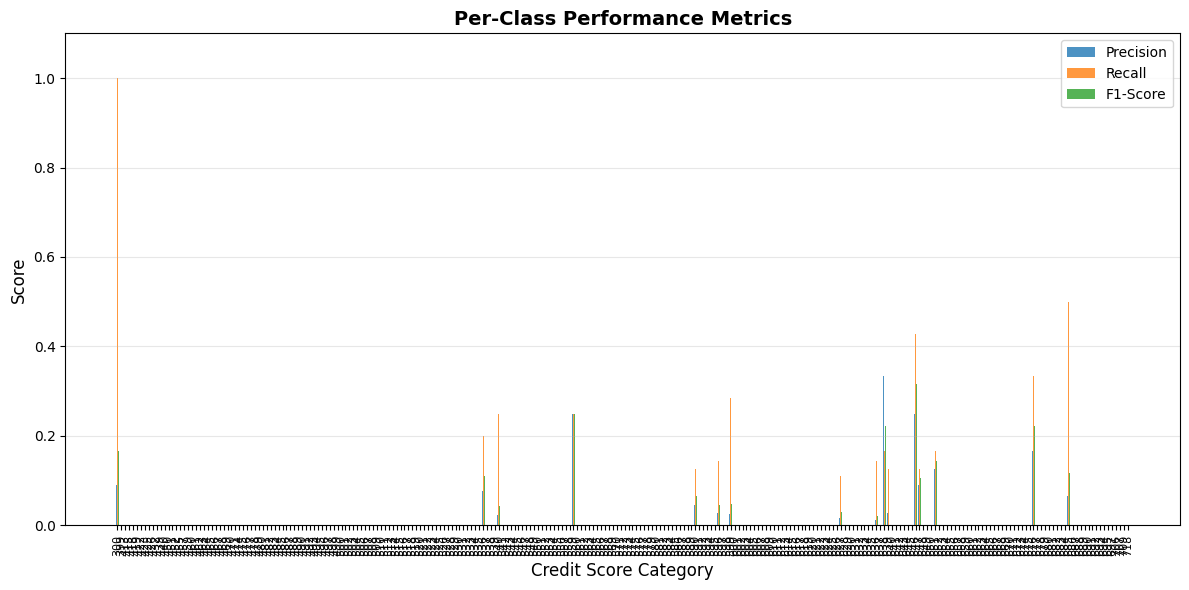

In [37]:
# Visualize per-class metrics
fig, ax = plt.subplots(figsize=(12, 6))

# Use the number of unique labels present in y_test for the x-axis
x = np.arange(len(unique_labels_in_test))
width = 0.25

ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
ax.bar(x, recall, width, label='Recall', alpha=0.8)
ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Credit Score Category', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
# Use the filtered class names for tick labels
ax.set_xticklabels(class_names_for_metrics, rotation=90, fontsize=8) # Added rotation for readability
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## 8. Default Prediction (Binary Classification)

In [38]:
# Optional: Build a separate model for default prediction
def create_binary_model(input_dim, hidden_layers=[128, 64, 32]):
    """
    Create a Feedforward Neural Network for binary classification (default prediction)
    """
    model = models.Sequential()

    model.add(layers.Input(shape=(input_dim,)))

    for i, units in enumerate(hidden_layers):
        model.add(layers.Dense(units, activation='relu', name=f'hidden_{i+1}'))
        model.add(layers.Dropout(0.3, name=f'dropout_{i+1}'))
        model.add(layers.BatchNormalization(name=f'batch_norm_{i+1}'))

    # Binary output with sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid', name='output'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [41]:
# Prepare data for default prediction
y_default_array = y_default.values

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(
    X_encoded,
    y_default_array,
    test_size=0.2,
    random_state=42,
    stratify=y_default_array
)

# Scale features
scaler_def = StandardScaler()
X_train_def_scaled = scaler_def.fit_transform(X_train_def)
X_test_def_scaled = scaler_def.transform(X_test_def)

print("Default prediction data prepared!")
print(f"Class distribution - Train: {np.bincount(y_train_def)}")
print(f"Class distribution - Test: {np.bincount(y_test_def)}")

Default prediction data prepared!
Class distribution - Train: [2834 1162]
Class distribution - Test: [708 291]


In [42]:
# Create and train binary model
binary_model = create_binary_model(input_dim, hidden_layers=[128, 64, 32])

print("Binary Model Architecture:")
binary_model.summary()

Binary Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │        10,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,145 (86.50 KB)

 Trainable params: 21,697 (84.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [43]:
# Train binary model
print("Training binary classification model for default prediction...\n")

history_binary = binary_model.fit(
    X_train_def_scaled,
    y_train_def,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nBinary model training complete!")

Training binary classification model for default prediction...

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.5281 - loss: 0.8568 - val_accuracy: 0.6988 - val_loss: 0.6145 - learning_rate: 0.0010
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6146 - loss: 0.7008 - val_accuracy: 0.7138 - val_loss: 0.5963 - learning_rate: 0.0010
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 0.6598 - val_accuracy: 0.7250 - val_loss: 0.5825 - learning_rate: 0.0010
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6614 - loss: 0.6339 - val_accuracy: 0.7275 - val_loss: 0.5788 - learning_rate: 0.0010
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6507 - loss: 0.6384 - val_accuracy: 0.7287 - val_loss: 0.5775 - learning_rate: 0.0010
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6706 - loss: 0.6199 - val_accuracy: 0.7350 - val_loss: 0.5729 - learning_rate: 0.0010
Epoch 7/100
100/

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
BINARY CLASSIFICATION (DEFAULT PREDICTION) RESULTS
Accuracy: 70.57%

Classification Report:
              precision    recall  f1-score   support

  No Default       0.72      0.96      0.82       708
     Default       0.47      0.08      0.14       291

    accuracy                           0.71       999
   macro avg       0.59      0.52      0.48       999
weighted avg       0.65      0.71      0.62       999



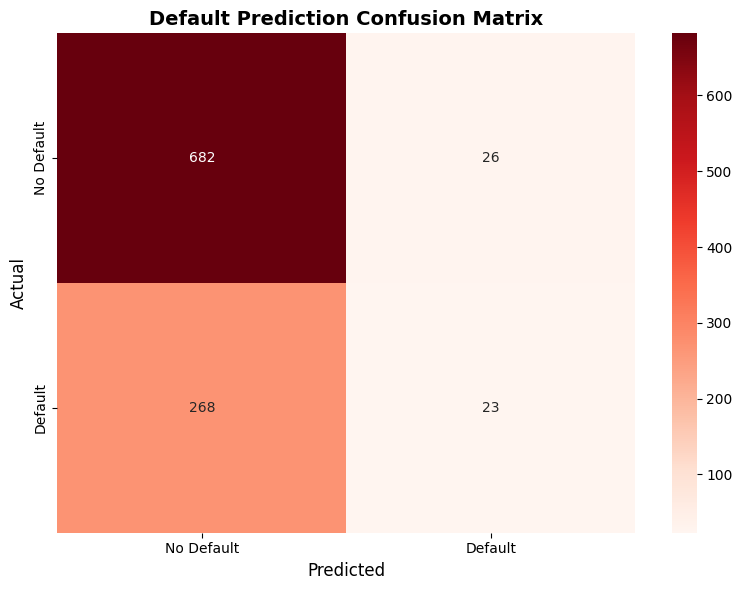

In [44]:
# Evaluate binary model
y_pred_default_proba = binary_model.predict(X_test_def_scaled)
y_pred_default = (y_pred_default_proba > 0.5).astype(int).flatten()

print("BINARY CLASSIFICATION (DEFAULT PREDICTION) RESULTS")
print("="*70)
print(f"Accuracy: {accuracy_score(y_test_def, y_pred_default)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test_def, y_pred_default, target_names=['No Default', 'Default']))

# Confusion matrix for binary classification
cm_binary = confusion_matrix(y_test_def, y_pred_default)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_binary,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)
plt.title('Default Prediction Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Save the Models

In [48]:
# Save the multi-class model
model.save('credit_score_model.h5')
print("Credit score model saved as 'credit_score_model.h5'")

# Save the binary model
binary_model.save('default_prediction_model.h5')
print("Default prediction model saved as 'default_prediction_model.h5'")

# Save the scalers and encoders
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

print("\nAll artifacts saved successfully!")

Credit score model saved as 'credit_score_model.h5'
Default prediction model saved as 'default_prediction_model.h5'

All artifacts saved successfully!


## 10. Make Predictions on New Data

In [49]:
# Example: Predict on a new customer
def predict_credit_score(model, scaler, label_encoder, customer_features):
    """
    Predict credit score for a new customer

    Args:
        model: Trained model
        scaler: Fitted scaler
        label_encoder: Label encoder for target
        customer_features: Feature values for the customer (array)

    Returns:
        Predicted credit score category and probabilities
    """
    # Scale features
    features_scaled = scaler.transform([customer_features])

    # Predict
    probabilities = model.predict(features_scaled, verbose=0)[0]
    predicted_class = np.argmax(probabilities)
    predicted_label = label_encoder.classes_[predicted_class]

    return predicted_label, probabilities

# Example usage
sample_customer = X_test_scaled[0]  # Use first test sample
predicted_score, probabilities = predict_credit_score(model, scaler, le_target, sample_customer)

print("Prediction for sample customer:")
print(f"Predicted Credit Score: {predicted_score}")
print(f"Probabilities: {dict(zip(le_target.classes_, probabilities))}")
print(f"Actual Credit Score: {le_target.classes_[y_test[0]]}")

Prediction for sample customer:
Predicted Credit Score: 419
Probabilities: {np.int64(300): np.float32(0.0), np.int64(313): np.float32(0.0), np.int64(330): np.float32(0.0), np.int64(351): np.float32(0.0), np.int64(352): np.float32(0.0), np.int64(358): np.float32(0.0), np.int64(361): np.float32(0.0), np.int64(363): np.float32(0.0), np.int64(365): np.float32(0.0), np.int64(368): np.float32(0.0), np.int64(369): np.float32(0.0), np.int64(373): np.float32(0.0), np.int64(374): np.float32(0.0), np.int64(375): np.float32(0.0), np.int64(376): np.float32(0.0), np.int64(379): np.float32(0.0), np.int64(381): np.float32(0.0), np.int64(383): np.float32(0.0), np.int64(385): np.float32(0.0), np.int64(386): np.float32(0.0), np.int64(388): np.float32(0.0), np.int64(390): np.float32(0.0), np.int64(392): np.float32(0.0), np.int64(395): np.float32(0.0), np.int64(396): np.float32(0.0), np.int64(397): np.float32(0.0), np.int64(398): np.float32(0.0), np.int64(399): np.float32(0.0), np.int64(400): np.float32(0.

## Summary

### Model Architecture:
- **Input Layer**: All customer features (numerical + encoded categorical)
- **Hidden Layers**: 3 dense layers (128, 64, 32 neurons) with ReLU activation
- **Regularization**: Dropout (30%) and Batch Normalization
- **Output Layer**: Softmax for multi-class classification (credit scores)

### Results:
- Multi-class classification for credit score prediction
- Binary classification for default prediction
- Comprehensive evaluation metrics (accuracy, precision, recall, F1-score)
- Confusion matrices for both tasks

### Key Features:
- Early stopping to prevent overfitting
- Learning rate reduction on plateau
- Standardized features for better training
- Stratified train-test split
- Saved models for future use